In [1]:
import matplotlib.pyplot as plt
import plotly as ply
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("./dati_polveri/polveri_emilia_PM10.csv")
df.head()

,02000003_005_202007.csv,COD_STAZ,ID_PARAM,DATA_INIZIO,DATA_FINE,VALORE,UM,Anno,Mese,Giorno,...,Mesenome,Stazione,COMUNE,INDIRIZZO,PROVINCIA,Altezza,PARAMETRO,TipoStazione,TipoArea,Zonizzazione
0,02000003_005_202007.txt,2000003,5,43831,43832,52,ug/m3,2020,1,1,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
1,02000003_005_202007.txt,2000003,5,43832,43833,59,ug/m3,2020,1,2,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
2,02000003_005_202007.txt,2000003,5,43833,43834,45,ug/m3,2020,1,3,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
3,02000003_005_202007.txt,2000003,5,43834,43835,42,ug/m3,2020,1,4,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
4,02000003_005_202007.txt,2000003,5,43835,43836,31,ug/m3,2020,1,5,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest


In [3]:
def string_date(anno,mese,giorno):
    return str(anno)+"-"+str(mese).zfill(2)+"-"+str(giorno).zfill(2)

In [4]:
#res = df[(df['Stazione']=='MARECCHIA')]
res = df[df['Anno'] == 2018].copy()
aux_df = res[['Anno','Mese', 'Giorno', 'Stazione', 'VALORE']].copy()
aux_df['VALORE'].replace(to_replace=0, value=1, inplace=True)
lista_date = aux_df.apply(lambda vec : string_date(vec[0],vec[1],vec[2]),axis=1).tolist()
lista_log = aux_df.apply(lambda vec : np.log(vec[4]),axis=1).tolist()

final_df = res[['Stazione','VALORE']].copy()
final_df['Date'] = lista_date
final_df['LogVal'] = lista_log


final_df = final_df.sort_values(by=['Stazione','Date'])
final_df.head()

,Stazione,VALORE,Date,LogVal
75727,BADIA,39,2018-01-01,3.663562
75728,BADIA,13,2018-01-02,2.564949
75729,BADIA,12,2018-01-03,2.484907
75730,BADIA,15,2018-01-04,2.708050
75731,BADIA,34,2018-01-05,3.526361


In [5]:
sns.set_theme(style="ticks")

print(len(final_df['Stazione'].drop_duplicates().tolist()))
palette = sns.color_palette("YlOrRd",n_colors=len(final_df['Stazione'].drop_duplicates().tolist()))



49


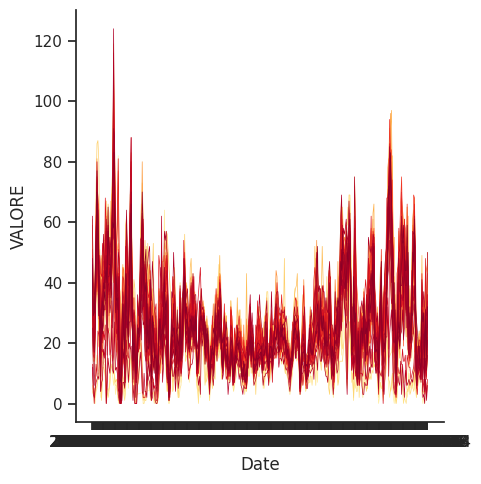

In [6]:
g = sns.relplot(
    data=final_df,
    x="Date", y="VALORE",
    kind="line",hue="Stazione",palette=palette,linewidth=0.5
)
g._legend.remove()

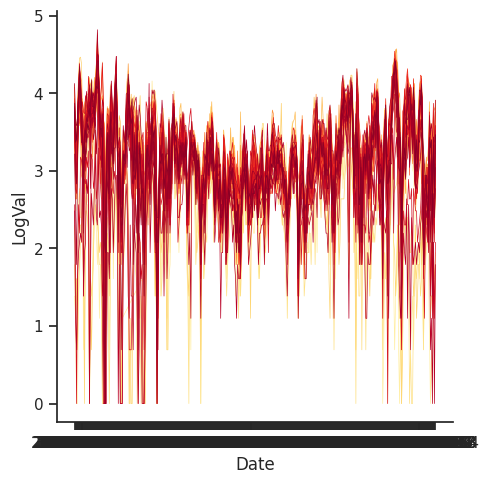

In [7]:

g = sns.relplot(
    data=final_df,
    x="Date", y="LogVal",
    kind="line",hue="Stazione",palette=palette,linewidth=0.5
)
g._legend.remove()

In [8]:
ru = datetime.date.fromisocalendar(2018,51,1)
print(ru)
rd = datetime.date.fromisocalendar(2018,52,1)
print(rd)
final_df[(final_df['Date'] >= str(ru)) & (final_df['Date'] < str(rd))]

2018-12-17
2018-12-24


,Stazione,VALORE,Date,LogVal
76063,BADIA,30,2018-12-17,3.401197
76064,BADIA,22,2018-12-18,3.091042
76065,BADIA,37,2018-12-19,3.610918
76066,BADIA,26,2018-12-20,3.258097
76067,BADIA,20,2018-12-21,2.995732
...,...,...,...,...
89806,ZALAMELLA,49,2018-12-19,3.891820
89807,ZALAMELLA,44,2018-12-20,3.784190
89808,ZALAMELLA,44,2018-12-21,3.784190
89809,ZALAMELLA,59,2018-12-22,4.077537


In [9]:
vec_mean_val = np.zeros(52)
vec_mean_log_val = np.zeros(52)
vec_std_val = np.zeros(52)
vec_std_log_val = np.zeros(52)
vec_var_val = np.zeros(52)
vec_var_log_val = np.zeros(52)

for i in range(51):
    ru = datetime.date.fromisocalendar(2018,i+1,1)
    rd = datetime.date.fromisocalendar(2018,i+2,1)
    aux_df = final_df[(final_df['Date'] >= str(ru)) & (final_df['Date'] < str(rd))]    
    vec_mean_val[i] = np.mean(aux_df['VALORE'].to_numpy())
    vec_mean_log_val[i] = np.mean(aux_df['LogVal'].to_numpy())
    vec_std_val[i] = np.std(aux_df['VALORE'].to_numpy(),ddof=1)
    vec_std_log_val[i] = np.std(aux_df['LogVal'].to_numpy(),ddof=1)
    vec_var_val[i] = np.var(aux_df['VALORE'].to_numpy(),ddof=1)
    vec_var_log_val[i] = np.var(aux_df['LogVal'].to_numpy(),ddof=1)
    
    
ru = datetime.date.fromisocalendar(2018,52,1)
rd = datetime.date.fromisocalendar(2018,52,7)
aux_df = final_df[(final_df['Date'] >= str(ru)) & (final_df['Date'] < str(rd))]
vec_mean_val[51] = np.mean(aux_df['VALORE'].to_numpy())
vec_mean_log_val[51] = np.mean(aux_df['LogVal'].to_numpy())
vec_std_val[51] = np.std(aux_df['VALORE'].to_numpy(),ddof=1)
vec_std_log_val[51] = np.std(aux_df['LogVal'].to_numpy(),ddof=1)
vec_var_val[51] = np.var(aux_df['VALORE'].to_numpy(),ddof=1)
vec_var_log_val[51] = np.var(aux_df['LogVal'].to_numpy(),ddof=1)


d = {'week' : np.arange(1,53,1).tolist(),
    'mean_val' : vec_mean_val.tolist(), 
    'mean_log_val' : vec_mean_log_val.tolist(),
    'std_val' : vec_std_val.tolist(),
    'std_log_val' : vec_std_log_val.tolist(),
    'var_val' : vec_var_val.tolist(),
    'var_log_val' : vec_var_log_val.tolist()}

week_stats_df = pd.DataFrame(data = d)
print(week_stats_df)

    week   mean_val  mean_log_val    std_val  std_log_val     var_val  \
0      1  37.708207      3.427690  18.695081     0.775348  349.506060   
1      2  31.571856      3.354080  11.168082     0.530036  124.726052   
2      3  35.039755      3.331565  16.816265     0.851227  282.786758   
3      4  51.668693      3.819597  22.260849     0.570413  495.545389   
4      5  21.291411      2.606327  15.698047     1.165727  246.428664   
5      6  28.978462      3.244152  12.037345     0.572436  144.897683   
6      7  35.739264      3.402100  18.946957     0.658880  358.987192   
7      8  18.217125      2.746983   7.867301     0.690805   61.894430   
8      9  37.000000      3.493297  14.166566     0.604946  200.691589   
9     10  27.855385      3.185430  11.720011     0.644963  137.358651   
10    11  17.486486      2.643691   9.145278     0.802342   83.636112   
11    12  23.355422      3.041913   9.266784     0.539930   85.873294   
12    13  23.582090      2.826168  15.626966     0.

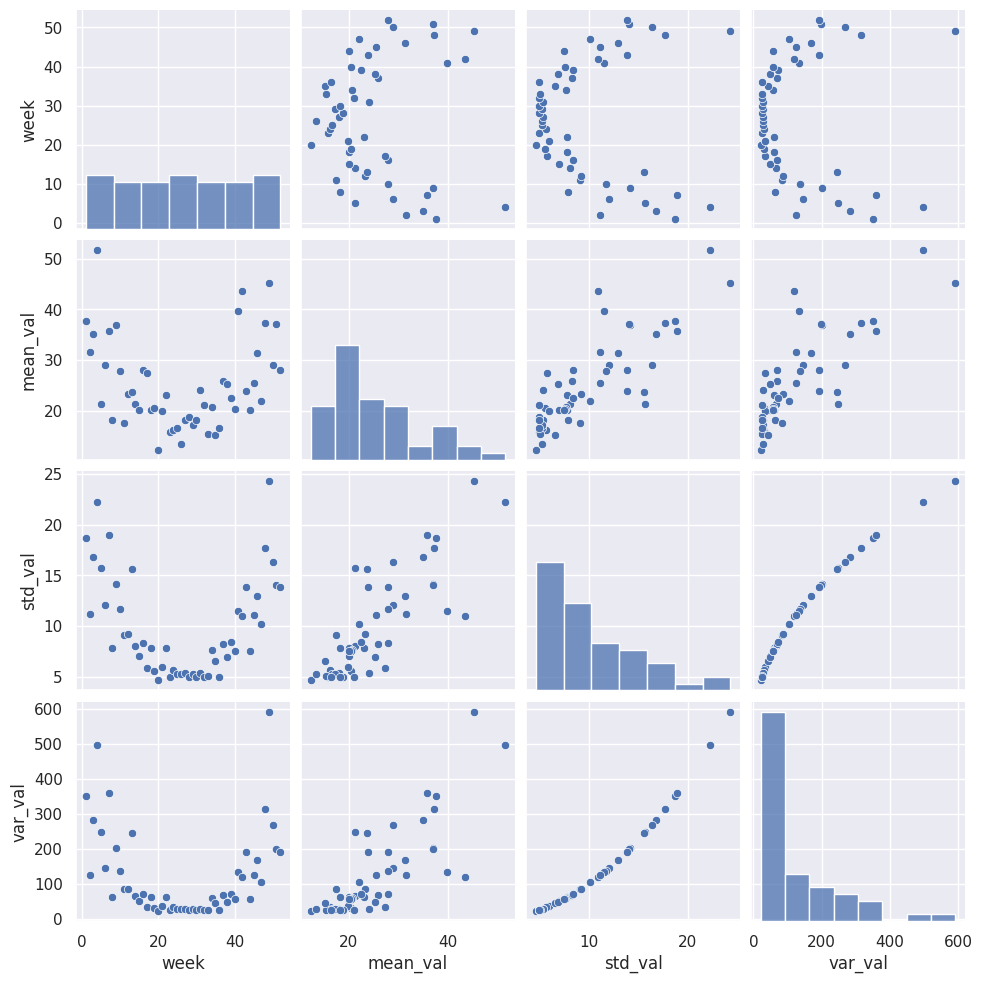

In [10]:
sns.set_theme()
sns.pairplot(week_stats_df[['week','mean_val','std_val','var_val']])

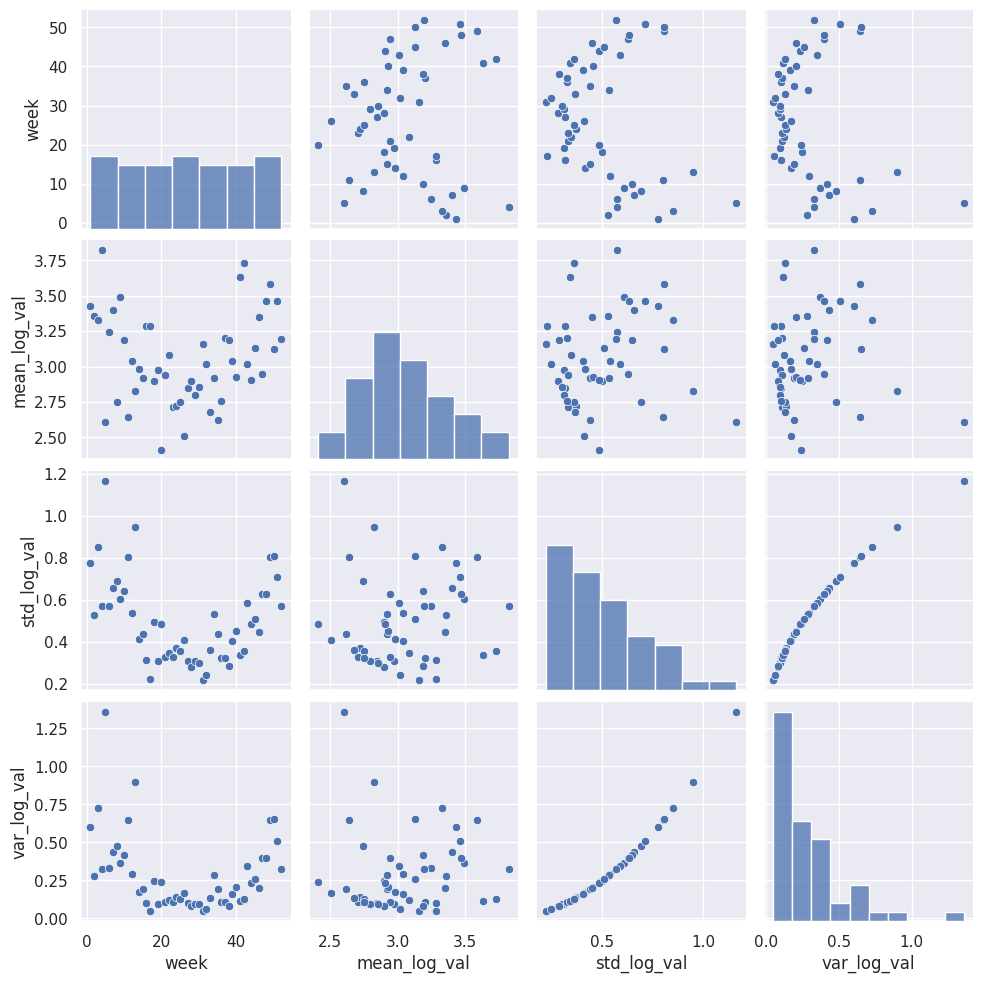

In [11]:
sns.pairplot(week_stats_df[['week','mean_log_val','std_log_val','var_log_val']])

<AxesSubplot: xlabel='LogVal', ylabel='Percent'>

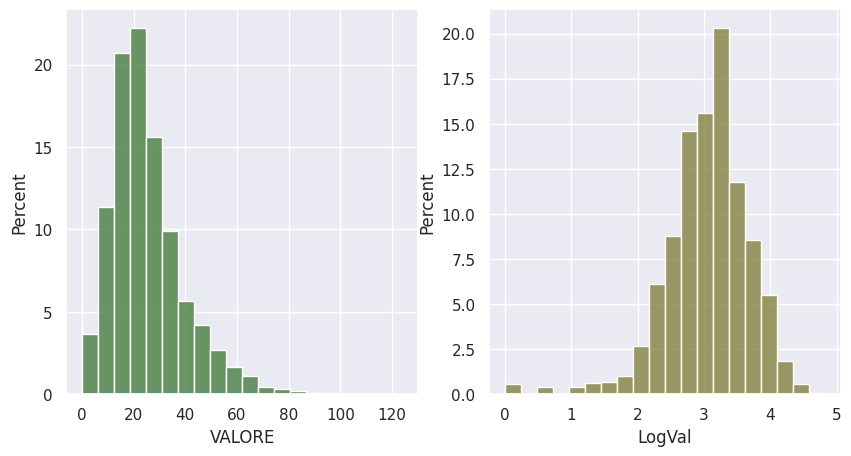

In [12]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,2,1)
sns.histplot(data=final_df['VALORE'], stat='percent', bins=20, color=sns.color_palette("cubehelix",10)[3])

ax = fig.add_subplot(1,2,2)
sns.histplot(data=final_df['LogVal'], stat='percent', bins=20, color=sns.color_palette("cubehelix",10)[4])
